In [2]:
%matplotlib inline
import numpy as np
from matplotlib import pylab
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
import csv
from collections import defaultdict
import pandas as pd

def avg(data, LEN):
    output = []
    for i in range((len(data) + LEN - 1) // LEN):
        sublist = data[i*LEN:(i+1)*LEN]
        output.append(sum(sublist) / len(sublist))
    return output

In [8]:
# Set global plot style
sns.set()
sns.set_style("ticks")
pylab.rcParams['figure.figsize'] = (15, 10)
sns.set_context("notebook", font_scale=3.5, rc={"lines.linewidth":5.5})

## Experiment 1) Approximating ReLU

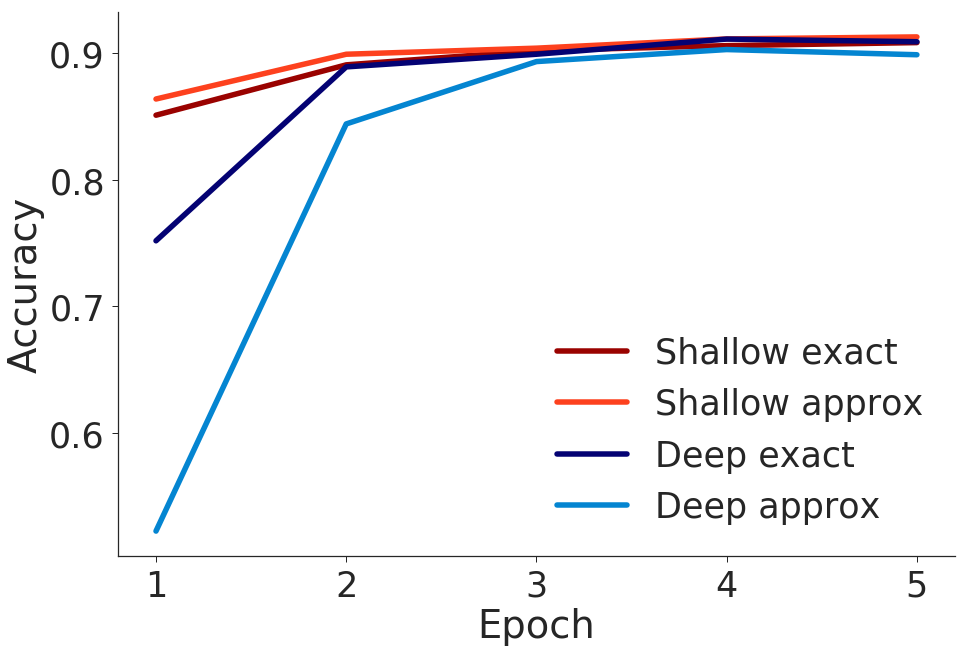

In [9]:
# Get data
file_names = ['exp1_convnet_shallow_exact', 'exp1_convnet_shallow_approx', 
              'exp1_convnet_deep_exact', 'exp1_convnet_deep_approx']

data = defaultdict(list)
for file_name in file_names:
    with open('results/' + file_name + '.csv', 'r') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        for row in reader:
            if row[7] != '' and row[1] != ' epoch':
                data[file_name].append([int(row[1]) + 1, float(row[7])])

x, y = [], []                
for file_name in file_names:
    x_, y_ = zip(*data[file_name])
    x.append(list(x_))
    y.append(list(y_))
    
# Plot
f, ax = plt.subplots(1, 1)
ax.plot(x[0], y[0], sns.xkcd_rgb["deep red"], x[1], y[1], sns.xkcd_rgb["orange red"], 
         x[2], y[2], sns.xkcd_rgb["deep blue"], x[3], y[3], sns.xkcd_rgb["cerulean"])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
sns.despine()
ax.legend(['Shallow exact', 'Shallow approx', 'Deep exact', 'Deep approx'])
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.savefig("results/img/exp1_relu_test.png", transparent=True) 

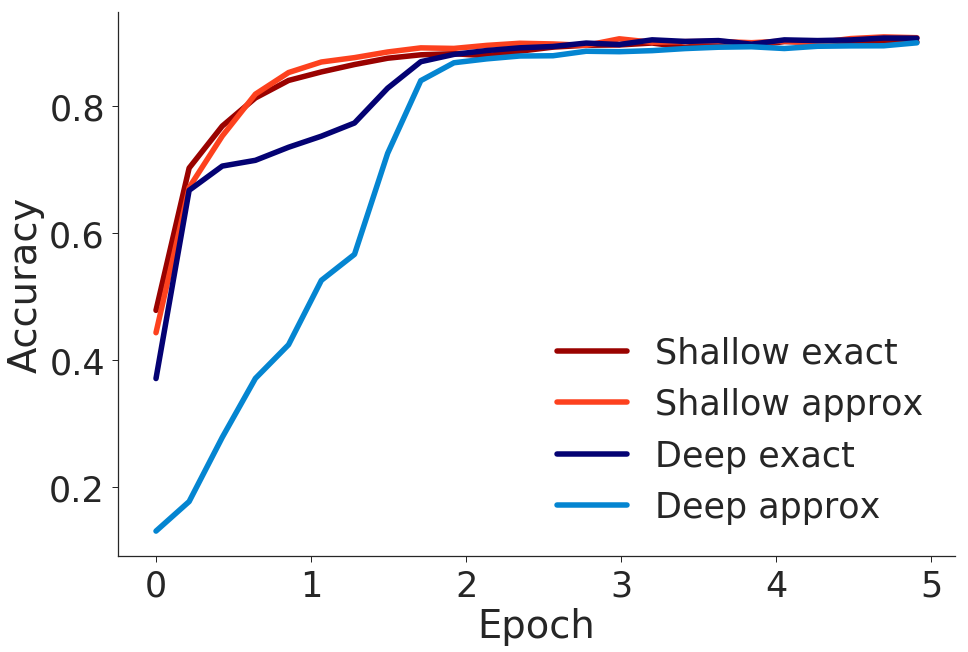

In [16]:
# Get data
file_names = ['exp1_convnet_shallow_exact', 'exp1_convnet_shallow_approx', 
              'exp1_convnet_deep_exact', 'exp1_convnet_deep_approx']

data = defaultdict(list)
for file_name in file_names:
    with open('results/' + file_name + '.csv', 'r') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        for row in reader:
            if row[1] != ' epoch': 
                data[file_name].append([int(row[1]) * 468 + int(row[2]), float(row[5])])

x, y = [], []                
for file_name in file_names:
    x_, y_ = zip(*data[file_name])
    x.append(list(x_))
    y.append(list(y_))

# Smooth data
smooth_scale = 100
for i, x_ in enumerate(x):
    x[i] = x_[0::smooth_scale]
    x[i][:] = [elem / 468 for elem in x[i]]
for i, y_ in enumerate(y):
    y[i] = avg(y_, smooth_scale)

# Plot
f, ax = plt.subplots(1, 1)
ax.plot(x[0], y[0], sns.xkcd_rgb["deep red"], x[1], y[1], sns.xkcd_rgb["orange red"], 
         x[2], y[2], sns.xkcd_rgb["deep blue"], x[3], y[3], sns.xkcd_rgb["cerulean"])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
sns.despine()
ax.legend(['Shallow exact', 'Shallow approx', 'Deep exact', 'Deep approx'])
ax = plt.gca()
fig = plt.gcf()
plt.savefig("results/img/exp1_relu_train.png", transparent=True) 

## Experiment 2) Computations in the finite field

In [ ]:
# Get data
file_names = ['exp1_convnet_shallow_exact', 'exp1_convnet_shallow_approx', 
              'exp1_convnet_deep_exact', 'exp1_convnet_deep_approx']

data = defaultdict(list)
for file_name in file_names:
    with open('results/' + file_name + '.csv', 'r') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        for row in reader:
            if row[1] != ' epoch': 
                data[file_name].append([int(row[1]) * 468 + int(row[2]), float(row[5])])

x, y = [], []                
for file_name in file_names:
    x_, y_ = zip(*data[file_name])
    x.append(list(x_))
    y.append(list(y_))

# Smooth data
smooth_scale = 100
for i, x_ in enumerate(x):
    x[i] = x_[0::smooth_scale]
for i, y_ in enumerate(y):
    y[i] = avg(y_, smooth_scale)

# Plot
f, ax = plt.subplots(1, 1)
ax.plot(x[0], y[0], sns.xkcd_rgb["deep red"], x[1], y[1], sns.xkcd_rgb["orange red"], 
         x[2], y[2], sns.xkcd_rgb["deep blue"], x[3], y[3], sns.xkcd_rgb["cerulean"])
plt.ylabel('Accuracy')
plt.xlabel('Iteration')
sns.despine()
ax.legend(['Shallow exact', 'Shallow approx', 'Deep exact', 'Deep approx'])
ax = plt.gca()
fig = plt.gcf()
plt.savefig("results/img/exp2.png", transparent=True) 

## Experiment 3) Computations on secretly encoded values